# 03 - Linear Regression




친숙하게 알고 있는 Sin 그래프를 이용해서 <br>
Linear Regression 을 Scikit Learn Library 를 이용해 수행해보자

### Import Library

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Prepare simple dataset

In [2]:
print(np.pi)

3.141592653589793


In [3]:
# true data
N = 100

# linspace = 선형 구간 혹은 로그 구간을 지정한 구간의 수만큼 분할한다.
# 시작, 끝(포함), 갯수
# reshape = 기존 데이터는 유지하고 차원과 형상을 바꿈.
# ex) 3개의 행과 4개의 열로 구성된 배열로 재설정하고 싶으면 reshape(3, 4)
# reshape(N,1) = N개 행, 1개 열

# x 값은 0/~2*pi 이고
# y 값은 -1~1 사이의 값
X = np.linspace(0, 2*np.pi, N).reshape(N, 1)
X[:5]

array([[0.        ],
       [0.06346652],
       [0.12693304],
       [0.19039955],
       [0.25386607]])

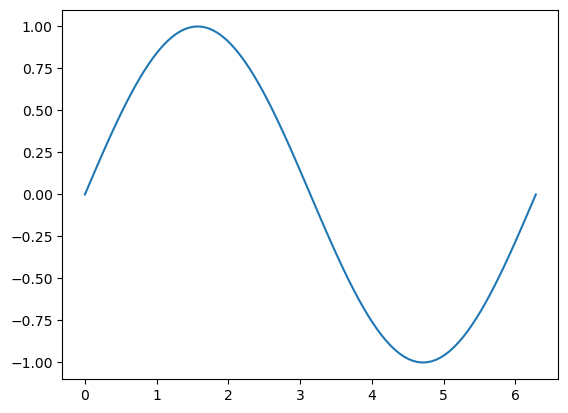

In [4]:
# plot 그리기

y = np.sin(X)
plt.plot(X, y)
# plt.scatter(X, y)
plt.show()

#### Noise 만들어주기
- rand (0과 1사이의 난수를 발생시키는) 명령어를 사용

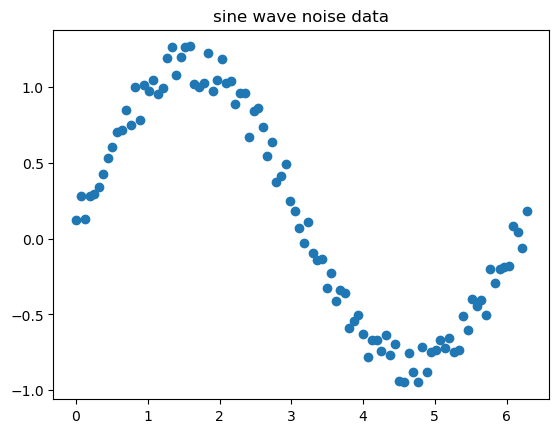

In [5]:
np.random.seed(1)
y += 0.3*np.random.rand(N, 1)

plt.scatter(X, y)
plt.title('sine wave noise data')
plt.show()

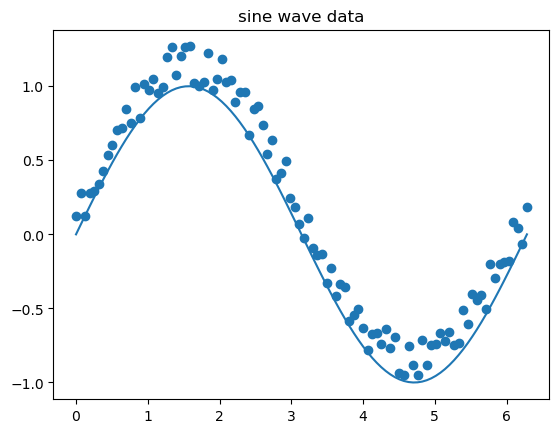

In [6]:
# 기존 그래프와 함께 plotting

y = np.sin(X)
plt.plot(X, y)

# add noise
np.random.seed(1)
y += 0.3*np.random.rand(N, 1)

plt.scatter(X, y)
plt.title('sine wave data')
plt.show()

#### Shuffle Dataset

In [7]:
# shuffle data
np.random.seed(10)

# N은 40이므로 1~40까지의 수를 섞어준다 (permutation(N))
idx = np.random.permutation(N)
print(idx)

[19 14 43 37 66  3 79 41 38 68  2  1 60 53 95 74 92 26 59 46 90 70 50 44
 76 55 21 61  6 63 42 34 84 52 35 39 45  4  5 48 32 20 83 58 47 80 17 67
 81  7 87 97 98 99 24 10 96 86 56 71 23 22 91 94 18 27 88 57 31 65 12 82
 30 75 25 13 69 77 85 51 49 78 72 33 62 54 11 16 36 40  0 73  8 29 93 89
 28 64 15  9]


In [8]:
shuffle_X = X[idx]
shuffle_y = y[idx]

print(shuffle_X[:3])
print(shuffle_y[:3])

[[1.20586385]
 [0.88853126]
 [2.72906028]]
[[0.99357831]
 [0.78436274]
 [0.63771433]]


### Split train & test (3:1 의 비율)

In [9]:
# 3:1 의 비율로 train test 를 나눔
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

In [10]:
# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

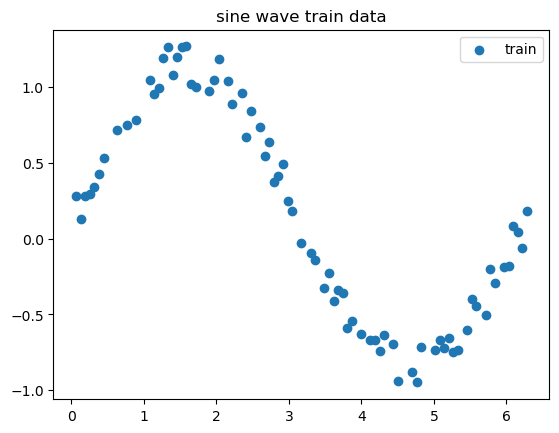

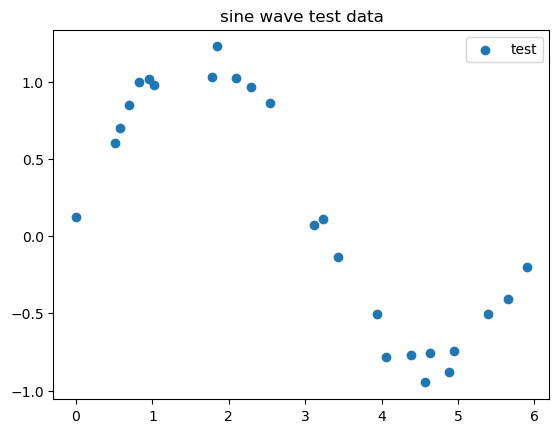

In [11]:
# plot
plt.scatter(X_train, y_train, label='train')
plt.legend()
plt.title('sine wave train data')
plt.show()

plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.title('sine wave test data')
plt.show()

### Perform Linear Regression
- compute W using sklearn library

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)



w0:  [1.02083628]
w1:  [[-0.27359283]]


### X data 을 이용해서 Prediction 을 하기 위해서는 .predict 를 이용

In [13]:
Pred = reg.predict(X_train)

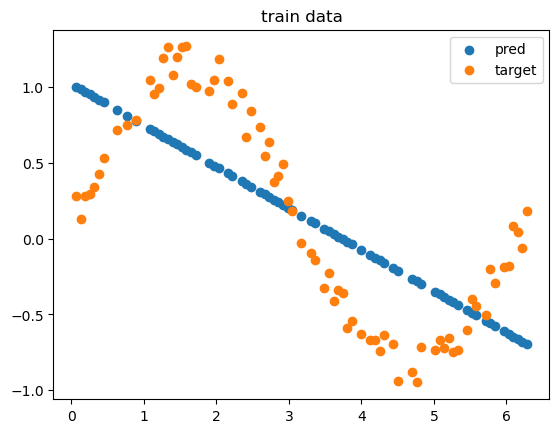

In [14]:
plt.figure()
plt.scatter(X_train, Pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

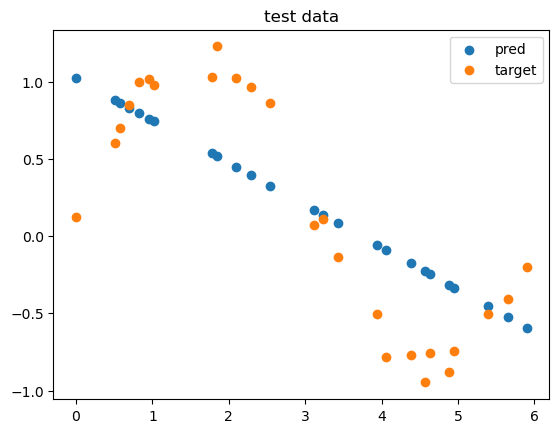

In [15]:
plt.figure()
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

## Practice
 - Another Dataset
 - 임의의 function 을 지정한 후 linear regression 을 수행
 
$ y = 2x + 5 $

In [16]:
X = 3 * np.random.rand(100,1)
y = 2 * X + 5

# add_noise
y_noise = y + np.random.rand(100, 1) # noise data 를 가진 y 값

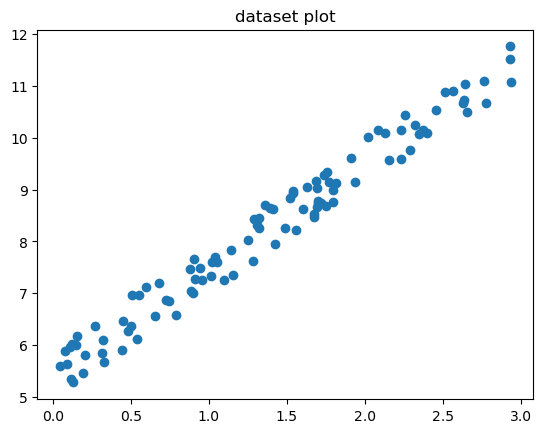

In [17]:
plt.scatter(X, y_noise)
plt.title('dataset plot')
plt.show()

#### 아까와 같은 방식으로 풀어보자

In [18]:
reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [5.46443632]
w1:  [[2.027286]]


$ {y = 2.027286x + 5.46443632} $

$ {y = 2x + 5} $

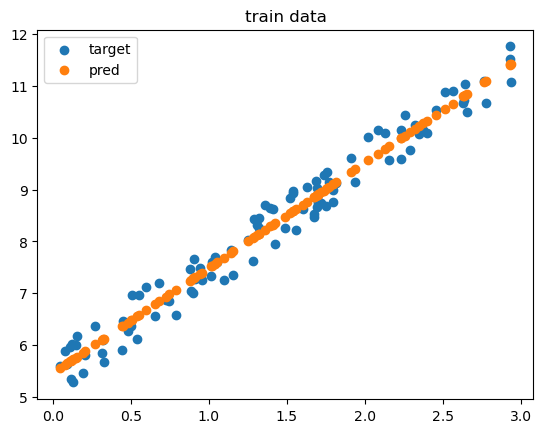

In [19]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')
plt.legend()
plt.title('train data')
plt.show()

***

## Polynomial Regression

#### Anonther Dataset

# $ y = x^2 + 3x + 5 $

In [20]:
np.random.seed(5)


N = 100
# 기존 x 범위는 0~6 사이였으나 -3 이 있으므로 -3~3 이 범위로 바뀌게 된다.
X = 6 * np.random.rand(N,1)-3 
y = X**2 + 3*X +5

In [21]:
X

array([[-1.66804097],
       [ 2.22439384],
       [-1.75968507],
       [ 2.51166545],
       [-0.06953287],
       [ 0.67046318],
       [ 1.59544714],
       [ 0.11050793],
       [-1.21919699],
       [-1.87367263],
       [-2.51555239],
       [ 1.43064178],
       [-0.35214466],
       [-2.05014079],
       [ 2.27962219],
       [-1.35548123],
       [-0.51458989],
       [-1.2235204 ],
       [ 0.77272745],
       [ 0.47902686],
       [ 0.59957518],
       [-1.40508529],
       [-1.29188472],
       [-1.47847077],
       [-1.03461631],
       [-2.1350142 ],
       [-2.00632283],
       [ 2.78358317],
       [ 2.76136029],
       [-1.86951207],
       [-2.85416063],
       [-1.77266672],
       [ 1.19906168],
       [ 1.67708751],
       [-2.86240145],
       [ 0.46597715],
       [-2.99014696],
       [ 0.09283567],
       [ 0.83877106],
       [ 2.91374642],
       [-1.44541442],
       [ 1.81498131],
       [ 2.22289852],
       [ 2.53649768],
       [-2.98671472],
       [-0

noise 추가

In [22]:
y_noise = y + 3*np.random.rand(N, 1)

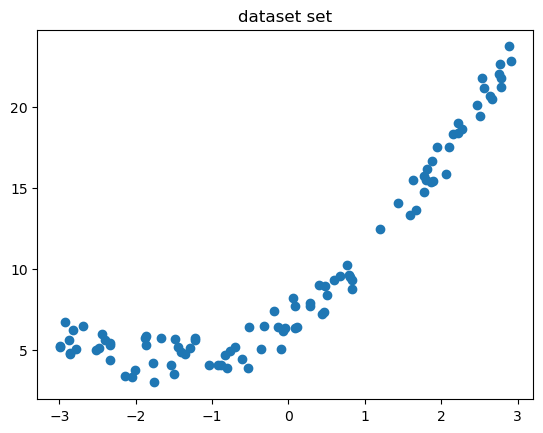

In [23]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y_noise)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [9.86809285]
w1:  [[2.97610592]]


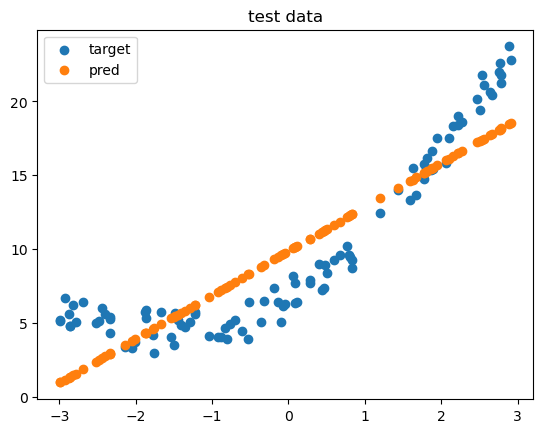

In [25]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(X), label='pred')

plt.legend()
plt.title('test data')
plt.show()

 - 위의 예시에서 보듯, Sin Function 그래프를 1차원 직선으로 나타내기엔 무리가 있음
 - X 의 feature 를 더 추가해주어서 좀 더 정확한 Linear Regression 을 수행

### 좀 더 자세히 살펴보자

위의 예시에서 풀어왔던 Linear Regression 의 경우

$ y_{1} = w_{1}x_{1} + w_{0} $

(여기서 $w_{1}$ 은 reg.coef_ 이고 $w_{0}$ 은 reg.intercept_ 로 구했음) <br>
와 같은 간단한 직선 방정식의 형태를 가정하고 풀었던 과정이었다.
***
이것은 우리가 가지고 있는 X 의 feature 가 하나 밖에 있지 않았기 때문이다.<br>

하지만 X 의 feature 를 제곱, 세제곱의 형태로 임의로 늘려준다면 방정식은 1차원의 직선이 아닌, 아래와 같이 고차원의 식으로 변할 수 있다.

$ y_{1} = w_{n}x_{1}^n + w_{n-1}x_{1}^{n-1} + ... + w_{2}x_{1}^2 + w_{1}x_{1}^1 + w_{0} $

즉, 기존의 X 를 제곱, 세제곱의 형태를 만들어서 feature 를 추가해준다면, 좀 더 정확한 Model 을 얻게 될 것이다.

****
#### Library 를 이용해서 feature 를 추가해보자.

Feature 를 추가 할 때는 PolynomialFeatures 를 사용<br>
제곱, 세제곱 등의 계산이 가능

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2) ## default
# transform from (x1, x2) to (x1, x2, x1^2, x1*x2, x2^2) ## include_bias = False

polynomial = PolynomialFeatures(degree = 2, include_bias = False)
new_feature = polynomial.fit_transform(X)


In [28]:
print("기존의 x[0]:",X[0])
print("Feature가 추가된 x[0]:", new_feature[0])

기존의 x[0]: [-1.66804097]
Feature가 추가된 x[0]: [-1.66804097  2.78236069]


In [29]:
print(-1.66804097*-1.66804097)

2.782360677598541


In [30]:
new_feature.shape

(100, 2)

In [31]:
new_feature[:5]

array([[-1.66804097e+00,  2.78236069e+00],
       [ 2.22439384e+00,  4.94792794e+00],
       [-1.75968507e+00,  3.09649154e+00],
       [ 2.51166545e+00,  6.30846332e+00],
       [-6.95328672e-02,  4.83481963e-03]])

##### Feature 를 추가한 상태에서 LinearRegression 을 다시 사용

In [32]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(new_feature, y_noise)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [6.82439098]
w1:  [[3.02103818 0.92278965]]


$ {y = x^2 + 3x + 5} $

$ {y = 0.92x^2 + 3.02x + 6.82} $

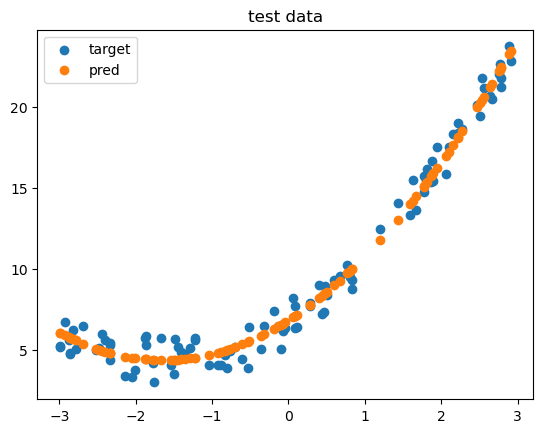

In [33]:
plt.figure()
plt.scatter(X, y_noise, label='target') 
plt.scatter(X, reg.predict(new_feature), label='pred')

plt.legend()
plt.title('test data')
plt.show()

# Practice1

## Polynomial Regression

x 의 범위는 -2~2 

$ {y = 3x^3 + 2x^2 + 7x + 5} $

In [34]:
np.random.seed(10)

N = 100
X = 4 * np.random.rand(N,1)-2 # -2~2 로 범위를 만들기 위해 -2 를 끝에 붙임
y = 3*X**3 + 2*X**2 + 7*X + 5

y_noise = y + 10*np.random.rand(N, 1)

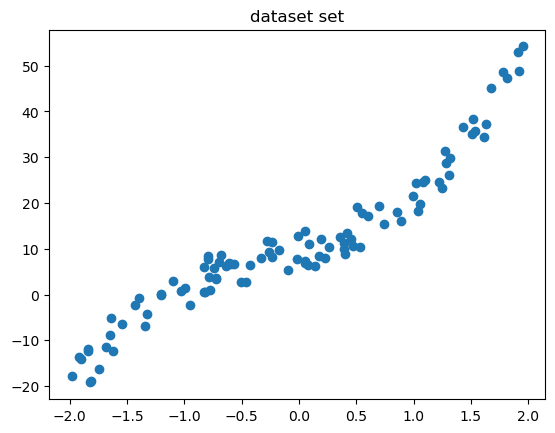

In [35]:
plt.scatter(X, y_noise)
plt.title('dataset set')
plt.show()

In [36]:
polynomial = PolynomialFeatures(degree = 3, include_bias = False)
new_feature_three = polynomial.fit_transform(X)

print("기존의 x[0]:",X[0])
print("Feature가 추가된 x[0]:", new_feature_three[0])

기존의 x[0]: [1.08528257]
Feature가 추가된 x[0]: [1.08528257 1.17783826 1.27828734]


In [37]:
reg = LinearRegression()
reg.fit(new_feature_three, y_noise)

print('b: ', reg.intercept_)
print('W: ', reg.coef_)

b:  [9.18157997]
W:  [[6.35064075 2.3300474  3.20666863]]


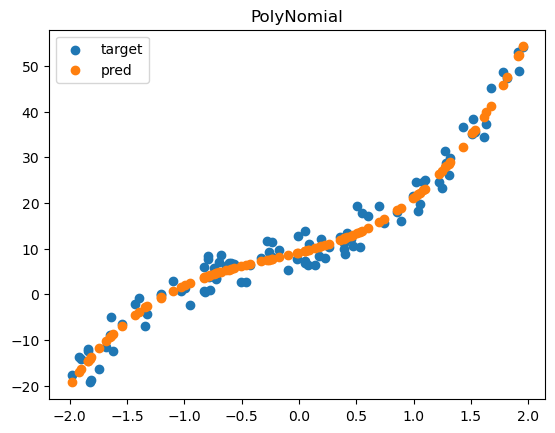

In [38]:
plt.figure()
plt.scatter(X, y_noise, label='target')
plt.scatter(X, reg.predict(new_feature_three), label='pred')

plt.legend()
plt.title('PolyNomial')
plt.show()

$ {y = 3x^3 + 2x^2 + 7x + 1} $

$ {y = 3.20x^3 + 2.33x^2 + 6.35x + 9.18} $

# Practice 2

### 앞서 했던 sin 함수를 1차 그래프가 아닌 다차원 그래프로 정확한 예측을 해보자

In [39]:
N = 100

X = np.linspace(0, 2*np.pi, N).reshape(N, 1)

y = np.sin(X)

y += 0.3*np.random.rand(N, 1)

In [40]:
polynomial = PolynomialFeatures(degree = 3, include_bias = False)
sin_new_feature = polynomial.fit_transform(X)

In [41]:
print("기존의 x[0]:",X[1])
print("Feature가 추가된 x[0]:", sin_new_feature[1])

기존의 x[0]: [0.06346652]
Feature가 추가된 x[0]: [0.06346652 0.004028   0.00025564]


In [42]:
sin_new_feature

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.34665183e-02, 4.02799894e-03, 2.55643068e-04],
       [1.26933037e-01, 1.61119958e-02, 2.04514455e-03],
       [1.90399555e-01, 3.62519905e-02, 6.90236284e-03],
       [2.53866073e-01, 6.44479830e-02, 1.63611564e-02],
       [3.17332591e-01, 1.00699973e-01, 3.19553835e-02],
       [3.80799110e-01, 1.45007962e-01, 5.52189027e-02],
       [4.44265628e-01, 1.97371948e-01, 8.76855724e-02],
       [5.07732146e-01, 2.57791932e-01, 1.30889251e-01],
       [5.71198664e-01, 3.26267914e-01, 1.86363797e-01],
       [6.34665183e-01, 4.02799894e-01, 2.55643068e-01],
       [6.98131701e-01, 4.87387872e-01, 3.40260924e-01],
       [7.61598219e-01, 5.80031847e-01, 4.41751222e-01],
       [8.25064737e-01, 6.80731821e-01, 5.61647821e-01],
       [8.88531256e-01, 7.89487792e-01, 7.01484579e-01],
       [9.51997774e-01, 9.06299761e-01, 8.62795355e-01],
       [1.01546429e+00, 1.03116773e+00, 1.04711401e+00],
       [1.07893081e+00, 1.16409

### Shuffle & Split train, test

In [43]:
# shuffle data
idx = np.random.permutation(N)

shuffle_X = sin_new_feature[idx]
shuffle_y = y[idx]

print(shuffle_X[:3])
print(shuffle_y[:3])

[[ 1.26933037  1.61119958  2.04514455]
 [ 4.31572324 18.6254671  80.38236122]
 [ 2.66559377  7.10539013 18.94008364]]
[[ 1.03214487]
 [-0.66475959]
 [ 0.69620849]]


In [44]:
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

### Perform Linear Regression

In [45]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('w0: ', reg.intercept_)
print('w1: ', reg.coef_)

w0:  [0.00949947]
w1:  [[ 1.82749375 -0.85010446  0.09020229]]


### Plotting

In [46]:
Pred = reg.predict(X_train)

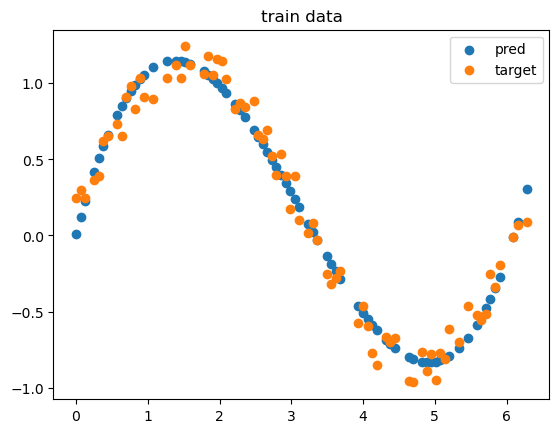

In [47]:
plt.figure()
plt.scatter(X_train[:,0], Pred, label='pred')
plt.scatter(X_train[:,0], y_train, label='target')
plt.legend()
plt.title('train data')
plt.show()

### Test data 로 plot

In [48]:
test_Pred = reg.predict(X_test)

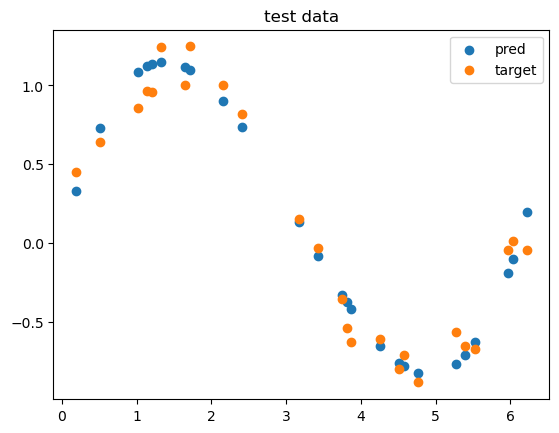

In [49]:
plt.figure()
plt.scatter(X_test[:,0], test_Pred, label='pred')
plt.scatter(X_test[:,0], y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

### Train, Test data 로 plot

In [50]:
X_all = shuffle_X[:]
y_all = shuffle_y[:]

all_Pred = reg.predict(X_all)

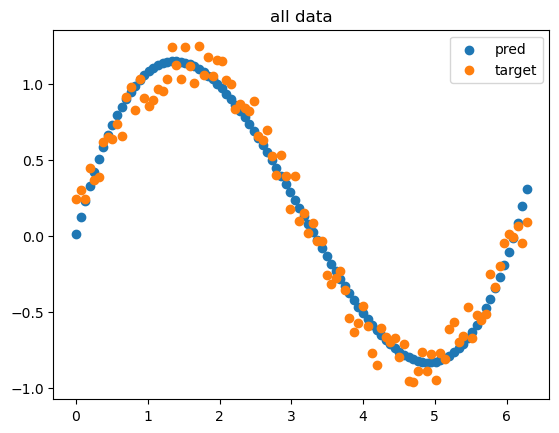

In [51]:
plt.figure()
plt.scatter(X_all[:,0], all_Pred, label='pred')
plt.scatter(X_all[:,0], y_all, label='target')
plt.legend()
plt.title('all data')
plt.show()